# Machine Learning for predicting survival  
# Shreekanth S , Deepak N , Ravi M (BA08)  
# 06-MAR-2021

# Importing Libraries

In [98]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data

In [46]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


**Some columns are redundant so we will exclude them**

In [48]:
#Dropping redundant columns
titanic.drop(columns=['who','adult_male','embark_town','alone','alive','class','deck'],inplace=True)

In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Missing Values

In [50]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

**Age a numerical column has missing values whilst 'Embarked a categorical column has missing values**  
**We will impute missing 'Age' values by the Median value and missing 'Embarked' values by the 'Most Frequent' values**  

In [51]:
#Distribution of embarked col
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [52]:
titanic['age'].describe()



count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [53]:
#Replace missing values with chosen values for each var
titanic_treated = titanic.fillna({'age':28,'embarked':'S'})

In [54]:
titanic_treated.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

# Outlier identification and treatment

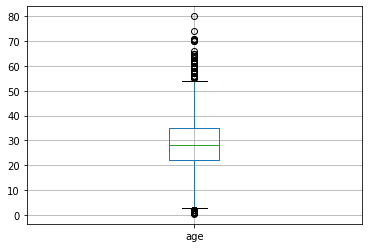

In [55]:
titanic_treated.boxplot('age')

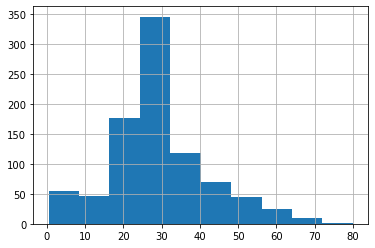

In [56]:
titanic_treated.age.hist()

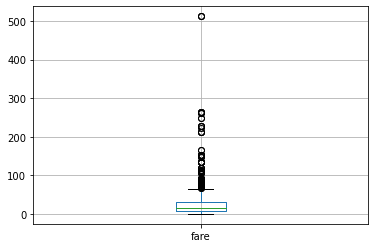

In [57]:
titanic_treated.boxplot('fare')

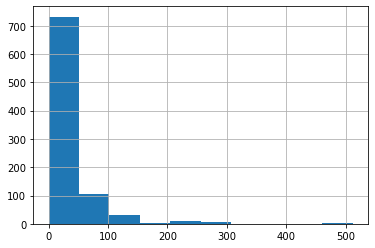

In [58]:
titanic_treated.fare.hist()

**Both age and fare have outliers. We will treat Outliers in 'Fare' by 'Flooring' and 'Capping'.**  

In [62]:
# quantile view
titanic_treated.fare.quantile([0,0.01,0.02,0.05,0.75,0.80,0.85,0.99])

0.00      0.00000
0.01      0.00000
0.02      6.39750
0.05      7.22500
0.75     31.00000
0.80     39.68750
0.85     56.49580
0.99    249.00622
Name: fare, dtype: float64

In [63]:
# quantil flooring (2 %ile) capping (85th % ile)
titanic_treated.fare = np.clip(titanic_treated.fare,titanic_treated.fare.quantile(0.02),titanic_treated.fare.quantile(0.85))

In [64]:
titanic_treated.fare.describe()

count    891.000000
mean      22.916807
std       17.934723
min        6.397500
25%        7.910400
50%       14.454200
75%       31.000000
max       56.495800
Name: fare, dtype: float64

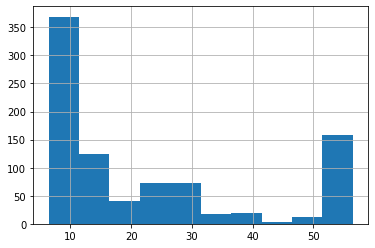

In [65]:
titanic_treated.fare.hist()

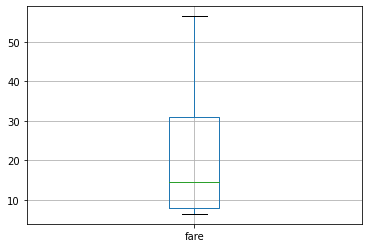

In [66]:
titanic_treated.boxplot('fare')

In [67]:
titanic_treated['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

# Exploratory Data Analysis

In [68]:
import pandas_profiling
eda_report = pandas_profiling.ProfileReport(titanic_treated)
eda_report
eda_report.to_file('eda.html')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
eda_report

**No Missing Values**  
**PClass and Fare are correlated**  


# Variable transformation

In [70]:
titanic_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [78]:
titanic_treated.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,56.4958,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Convert Categorical Variables to Dummies to enable data preparation for Modeling**  

In [79]:
# Dummy coding categorical variables
for x in titanic_treated.columns:
    if titanic_treated[x].dtype == "object":
        titanic_treated[x]=pd.Categorical(titanic_treated[x]).codes

In [80]:
titanic_treated.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,56.4958,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Model building

## Features and Label

In [87]:
# create an array of feature and target variables
x=titanic_treated.drop(['survived'],axis=1)
y=titanic_treated['survived']

## Train-Test Split

In [89]:
from sklearn.model_selection import train_test_split
#Create train and test data with 75% and 25% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(668, 7)
(223, 7)
(668,)
(223,)


### Logistic Regression

In [90]:
#Logistic Regression... Instantiate the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [91]:
#Train the model
lr.fit(train_x,train_y)

C:\Users\G V Swetha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
# Predict on Test Set
classes=lr.predict(test_x)

In [120]:
# Model evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,confusion_matrix
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Matrix")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.7892376681614349
Precision/Recall Matrix
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.72      0.73      0.72        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

AUC


0.7767643028434396

Confusion Matrix


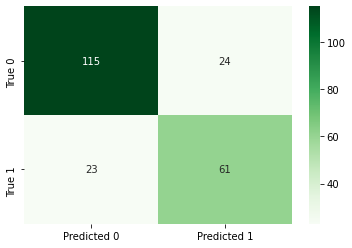

In [99]:
#Confusion matrix for Logistic regression
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0", "Predicted 1"]
lbl2=["True 0", "True 1"]
sns.heatmap(cf,annot=True,cmap='Greens',fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

### Decision Tree Classifier

In [115]:
#Decision Tree... Instantiate the model
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=2,criterion='entropy',max_depth=3)

In [116]:
# Train the model
clf.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [117]:
# Predict on test set
dtree_predicted=clf.predict(test_x)

In [121]:
# model evaluation
print("Accuracy Score")
print(metrics.accuracy_score(test_y,dtree_predicted))
print("Precision/Recall Matrix")
print(metrics.classification_report(test_y,dtree_predicted))
print("AUC")
auc=metrics.roc_auc_score(test_y,dtree_predicted)
auc

Accuracy Score
0.8161434977578476
Precision/Recall Matrix
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       139
           1       0.77      0.74      0.75        84

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223

AUC


0.8007022953066119

Confusion Matrix


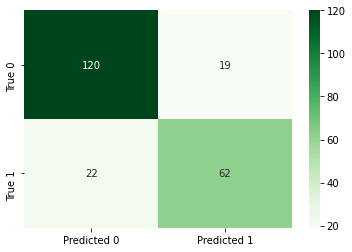

In [123]:
#Confusion matrix for Decision Trees
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,dtree_predicted)
lbl1=["Predicted 0", "Predicted 1"]
lbl2=["True 0", "True 1"]
sns.heatmap(cf,annot=True,cmap='Greens',fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

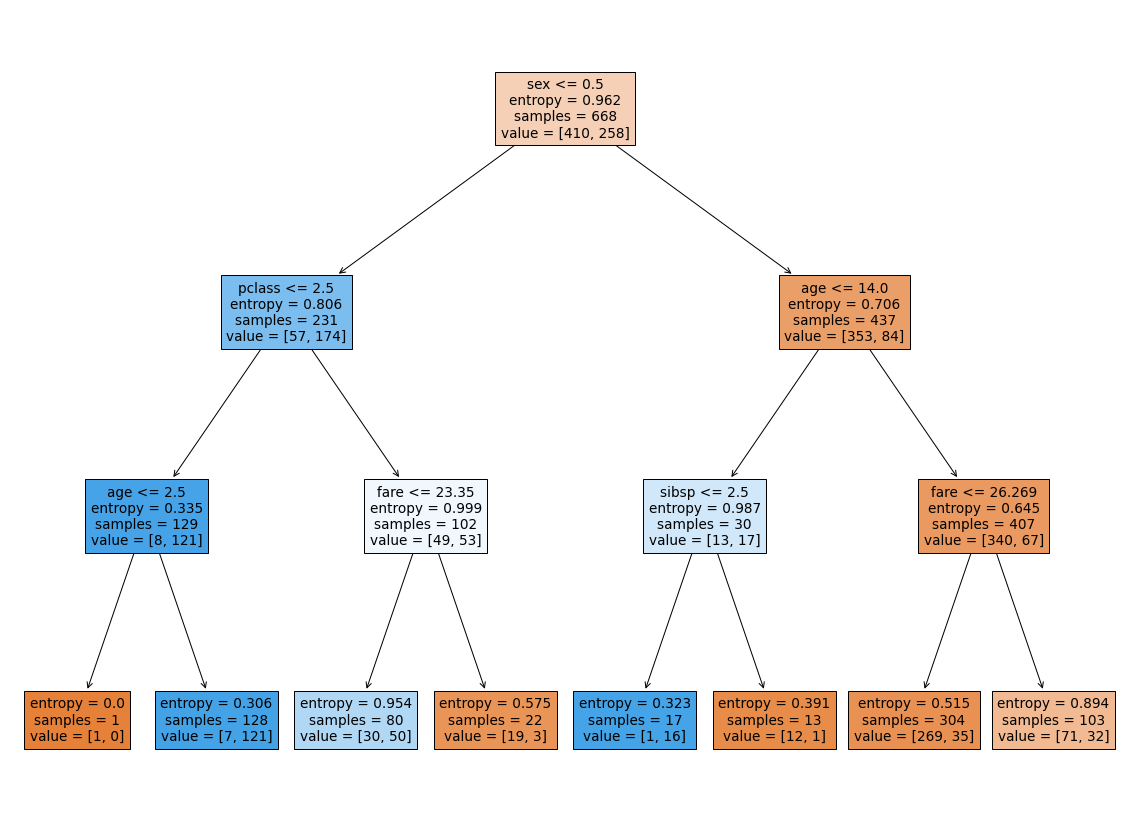

In [124]:
# Visualizing the model
plt.figure(figsize=(20,15))
tree.plot_tree(clf,filled=True,feature_names=x.columns,);

# Summary   
**Model Selection**  
We are interested in predicting survival which implies our focus will be recall rather than accuracy.  
Logistic Regression: Recall Rate is 73%  
Decision Tree      : Recall Rate is 74%  
So, Decison Tree has higher recall rate and better interpretable . Hence, our best model is Decision Tree classifier  

**Model Interpretation**  
1) Gender is the most important factor deciding the survival of the passenger followed by age  
2) If you are a female in 1/2 class and above 3 years , you have highest chance of survival  
3) If you are male greater than 14 years you will not survive  

